In [64]:
import requests
import json
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [65]:
test_url = 'http://localhost:8080/getallcase/'

In [66]:
response = requests.get(test_url)

In [67]:
df = pd.json_normalize(response.json())

In [68]:
df.head()

,id,provinceOrState,countryOrRegion,lastUpdated,confirmed,deaths,recovered,latitude,longitude,news
0,5e62d5c39343476292c50430,Hubei,Mainland China,2020-03-05T14:53:03,67466,2902,40592,30.9756,112.2707,[]
1,5e62d5c39343476292c50431,,South Korea,2020-03-05T09:03:09,6088,35,41,36.0000,128.0000,[]
2,5e62d5c39343476292c50432,,Italy,2020-03-05T17:43:03,3858,148,414,43.0000,12.0000,[]
3,5e62d5c39343476292c50433,,Iran,2020-03-05T13:43:04,3513,107,739,32.0000,53.0000,[]
4,5e62d5c39343476292c50434,Guangdong,Mainland China,2020-03-05T09:23:03,1351,7,1181,23.3417,113.4244,[]


In [69]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

In [70]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

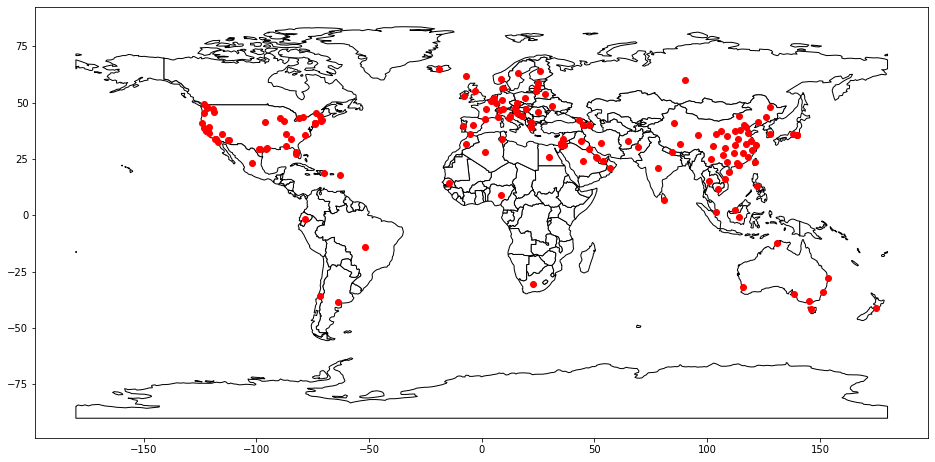

In [71]:
# We restrict to South America.
ax = world.plot(
    color='white', edgecolor='black' ,figsize = (16,24))

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red', figsize=(12, 20))

plt.show()